In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from math import sin, cos, pi

def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

# 1 Testing a projectile simulation

## 1.1 Building a simulation with Euler’s method

In [3]:
def trajectory(theta,speed=20,height=0,dt=0.01,g=-9.81):
    vx = 20 * cos(pi * theta / 180)
    vz = 20 * sin(pi * theta / 180)
    t,x,z = 0, 0, height
    ts, xs, zs = [t], [x], [z]
    while z >= 0:
        t += dt
        vz += g * dt
        x += vx * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        zs.append(z)
    return ts, xs, zs

In [4]:
def plot_trajectories(*trajs,show_seconds=False):
    for traj in trajs:
        xs, zs = traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            second_indices = []
            second = 0
            for i,t in enumerate(traj[0]):
                if t>= second:
                    second_indices.append(i)
                    second += 1
            plt.scatter([xs[i] for i in second_indices], [zs[i] for i in second_indices])
    xl = plt.xlim()
    plt.plot(plt.xlim(),[0,0],c='k')
    plt.xlim(*xl)

    width = 7
    coords_height = (plt.ylim()[1] - plt.ylim()[0])
    coords_width = (plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width , width * coords_height / coords_width)

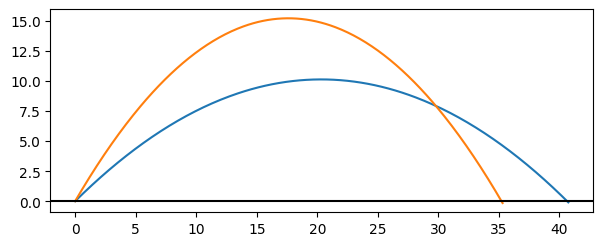

In [5]:
plot_trajectories(
    trajectory(45),
    trajectory(60))

## 1.2 Measuring properties of the trajectory

In [6]:
def landing_position(traj):
    return traj[1][-1]

def hang_time(traj):
    return traj[0][-1] #<1>

def max_height(traj):
    return max(traj[2])

## 1.3 Exploring different launch angles

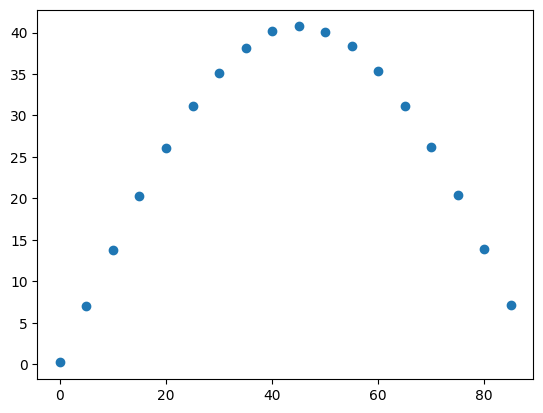

In [7]:
angles = range(0,90,5)
landing_positions = [landing_position(trajectory(theta)) for theta in angles]
plt.scatter(angles,landing_positions)

## 1.4 Exercises

### Ex12.1
発射の高さを0にして、50°の角度で発射した場合、砲弾はどこまで行くか？
130°の角度で発射した場合はどうか？

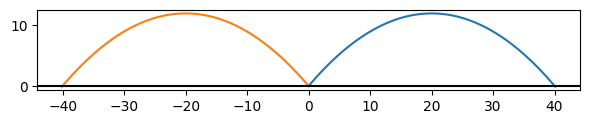

In [8]:
plot_trajectories(
    trajectory(50),
    trajectory(130))

### Ex12.2
plot_trajectories 関数を修正し、1秒ごとに大きな点を描くようにして、プロット上で時間の経過を確認できるようにせよ。

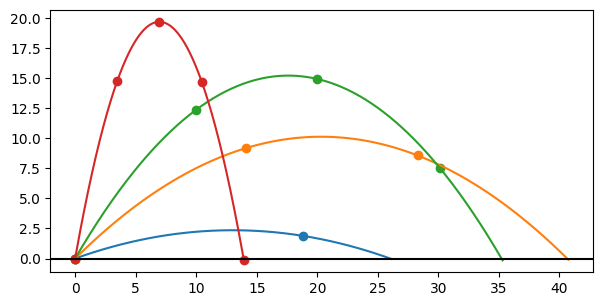

In [9]:
# サンプルコードでは元々、そのようになっていた。
# ここでは呼び出し部分を写経する
plot_trajectories(
    trajectory(20),
    trajectory(45),
    trajectory(60),
    trajectory(80),
    show_seconds=True
)

### Ex12.3
0度から180度の間の角度に対する飛行時間と角度の散布図を作成せよ。飛行時間はどの発射角度で最大になるか？

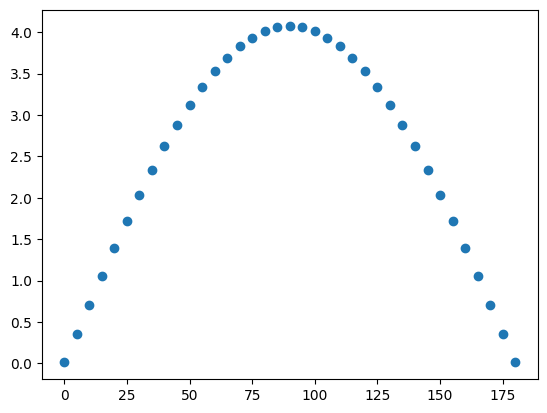

In [10]:
# hang_time を使えばよさそうだ。
test_angles = range(0,181,5)
hang_times = [hang_time(trajectory(theta)) for theta in test_angles]
plt.scatter(test_angles, hang_times)

### Ex12.4

In [11]:
def plot_trajectory_metric(metric,thetas,**settings):
    plt.scatter(thetas,[metric(trajectory(theta,**settings)) for theta in thetas])

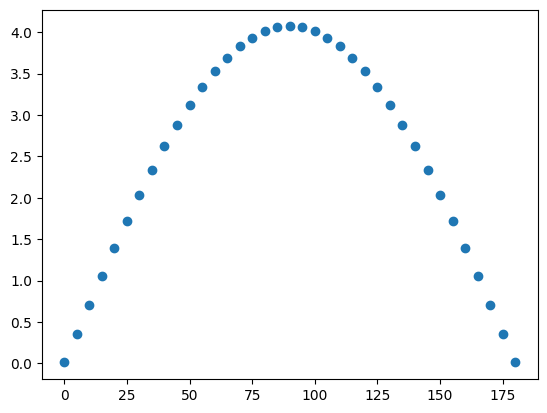

In [12]:
plot_trajectory_metric(hang_time, range(0,181,5))

### Ex12.5
発射の高さが10mの場合、砲弾の到達距離が最大になるおおよその発射角度を求めよ。

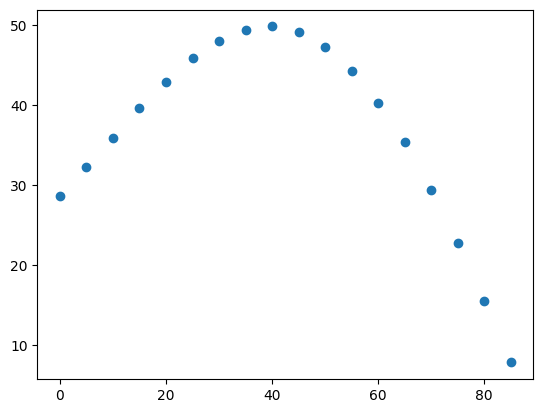

In [13]:
# plot_trajectory_metric を使えばよさそうだ
plot_trajectory_metric(landing_position, range(0,90,5), height=10)

### Ex12.7
sin(x)の微分係数がx=11π/2で0であることを確認せよ。

-2.4499125789312946e-15
17.27875959474386


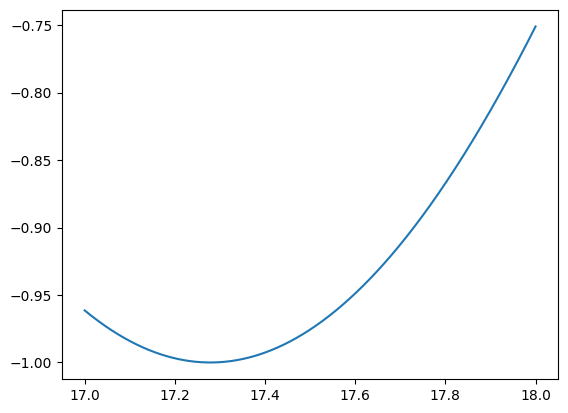

In [14]:
from math import sin, pi

# sinの微分係数である以下はほぼ0である
print(cos(11*pi/2))

# 11*pi/2 は17.27
print(11*pi/2)

# 17から18までsinをプロット。最小値である。
plot_function(sin,17,18)

### Ex12.8
f(x)=x^3-x の極大値と極小値はどこか？その値は何か？

In [15]:
from math import sqrt
# f'(x) は ±1/√3 で0になる
# そのときの f(x)の値は
x = 1 / sqrt(3)
minus_x = -x

print(f"極小値:{x**3 - x}")
print(f"極大値:{minus_x**3 - minus_x}")

極小値:-0.3849001794597505
極大値:0.3849001794597505


# 2 Calculating the optimal range

## 2.1 Finding the projectile range as a function of the launch angle

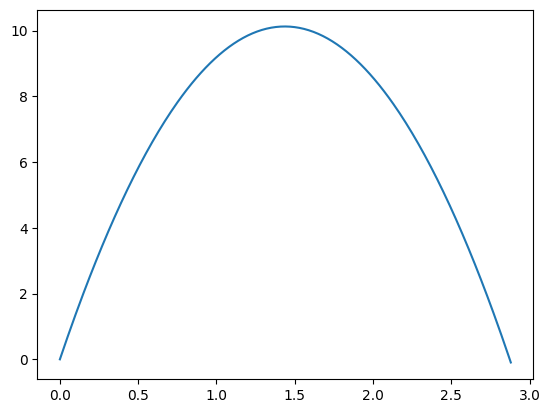

In [16]:
trj = trajectory(45)
ts, zs = trj[0], trj[2]
plt.plot(ts,zs)

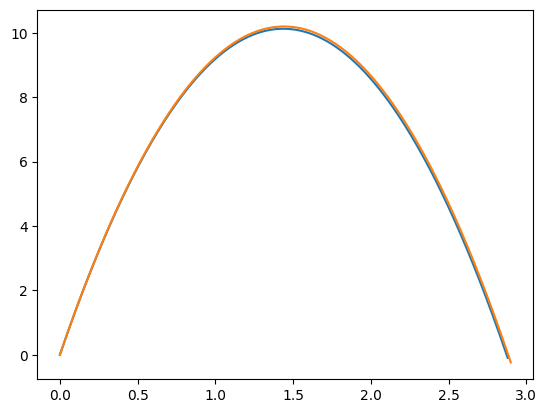

In [17]:
def z(t): #<1>
    return 20*sin(45*pi/180)*t + (-9.81/2)*t**2

plt.plot(ts,zs)
plot_function(z,0,2.9)

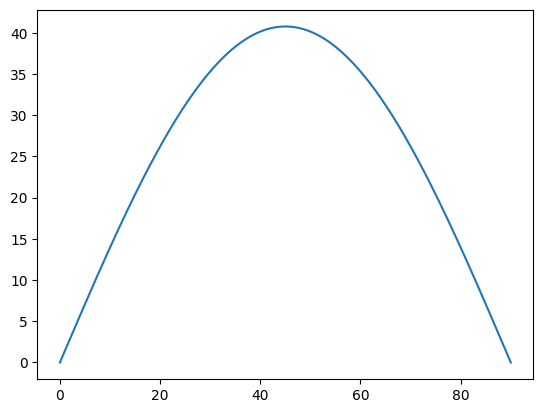

In [18]:
def r(theta):
    return (-2*20*20/-9.81)*sin(theta*pi/180)*cos(theta*pi/180)

plot_function(r,0,90)

## 2.2 Solving for the maximum range

In [19]:
r(45)

40.77471967380224

In [20]:
r(135)

-40.77471967380224

## 2.3 Identifying maxima and minima

# 3 Enhancing our simulation

## 3.1 Adding another dimension

In [21]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81):
    vx = 20 * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = 20 * cos(pi * theta / 180) * sin(pi * phi / 180)
    vz = 20 * sin(pi * theta / 180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= 0:
        t += dt
        vz += g * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

In [22]:
def plot_trajectory3d(traj):
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')
    ax.plot(traj[1],traj[2],traj[3])

/tmp/ipykernel_10194/848430536.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


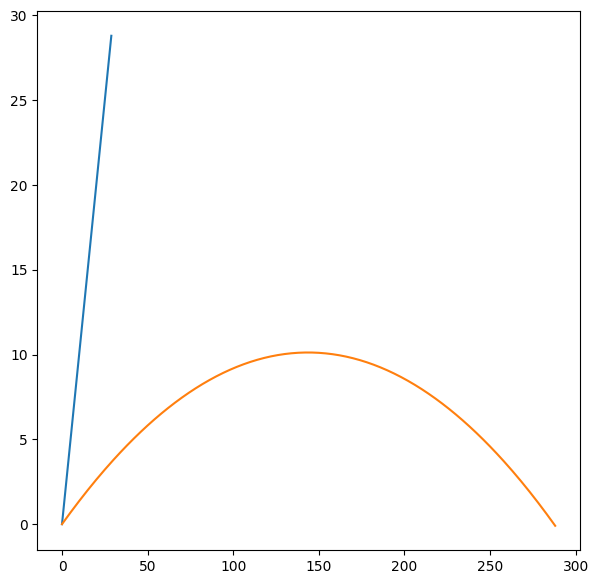

In [23]:
plot_trajectory3d(trajectory3d(45,45))

## 3.2 Modeling terrain around the cannon

In [24]:
def flat_ground(x,y):
    return 0

In [25]:
def ridge(x,y):
    return (x**2 - 5*y**2) / 2500

In [26]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81,elevation=flat_ground):
    vx = speed * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = speed * cos(pi * theta / 180) * sin(pi * phi / 180)
    vz = speed * sin(pi * theta / 180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= elevation(x,y):
        t += dt
        vz += g * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

In [27]:
def plot_trajectories_3d(*trajs,elevation=flat_ground,bounds=None,zbounds=None,shadows=False):
    fig, ax = plt.gcf(), plt.gca(projection='3d')
    fig.set_size_inches(7,7)

    if not bounds:
        xmin = min([x for traj in trajs for x in traj[1]])
        xmax = max([x for traj in trajs for x in traj[1]])
        ymin = min([x for traj in trajs for x in traj[2]])
        ymax = max([x for traj in trajs for x in traj[2]])

        padding_x = 0.1 * (xmax-xmin)
        padding_y = 0.1 * (ymax-ymin)
        xmin -= padding_x
        xmax += padding_x
        ymin -= padding_y
        ymax += padding_x

    else:
        xmin, xmax, ymin, ymax = bounds


    plt.plot([xmin,xmax],[0,0],[0,0],c='k')
    plt.plot([0,0],[ymin,ymax],[0,0],c='k')

    g = np.vectorize(elevation)
    ground_x = np.linspace(xmin, xmax, 20)
    ground_y = np.linspace(ymin, ymax, 20)
    ground_x, ground_y = np.meshgrid(ground_x,ground_y)
    ground_z = g(ground_x,ground_y)
    ax.plot_surface(ground_x, ground_y, ground_z, cmap=cm.coolwarm, alpha=0.5,
                       linewidth=0, antialiased=True)
    for traj in trajs:
        ax.plot(traj[1],traj[2],traj[3])
        if shadows:
            ax.plot([traj[1][0],traj[1][-1]],[traj[2][0],traj[2][-1]],[0,0],c='gray',linestyle='dashed')

    if zbounds:
        ax.set_zlim(*zbounds)

/tmp/ipykernel_10194/153478238.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig, ax = plt.gcf(), plt.gca(projection='3d')


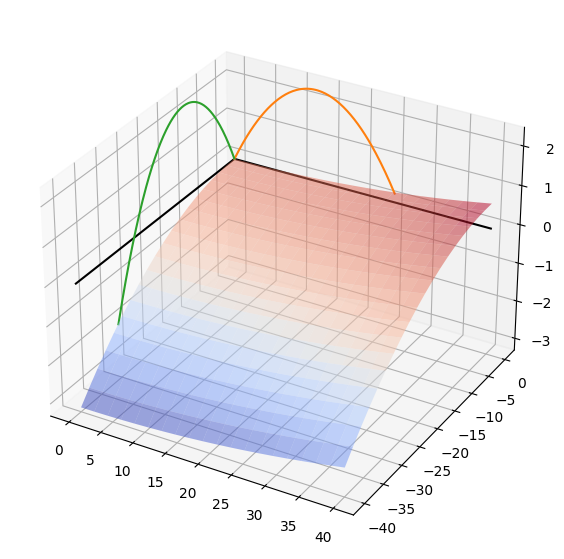

In [28]:
plot_trajectories_3d(
    trajectory3d(20,0,elevation=ridge),
    trajectory3d(20,270,elevation=ridge),
    bounds=[0,40,-40,0],
    elevation=ridge)

## 3.3 Solving for the range of the projectile in 3D

In [ ]:
from math import sqrt

B = 0.001 #<1>
C = 0.005
v = 20
g = -9.81

def velocity_components(v,theta,phi): #<2>
    vx = v * cos(theta*pi/180) * cos(phi*pi/180)
    vy = v * cos(theta*pi/180) * sin(phi*pi/180)
    vz = v * sin(theta*pi/180)
    return vx,vy,vz

def landing_distance(theta,phi): #<3>
    vx, vy, vz = velocity_components(v, theta, phi)
    v_xy = sqrt(vx**2 + vy**2) #<4>
    # 尾根は h(x,y)=Bx^2-Cy^2 で表される
    # <5>は着弾時に成り立つ方程式 at^2 + bt = 0 の a を表している
    a = (g/2) - B * vx**2 + C * vy**2 #<5>
    b = vz
    landing_time = -b/a #<6>
    landing_distance = v_xy * landing_time #<7>
    return landing_distance

## 3.4 Exercises

### Ex12.12
砲弾のシミュレーションに抗力(drag)パラメータを追加し、抗力がない場合と比較せよ。

/tmp/ipykernel_10194/153478238.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig, ax = plt.gcf(), plt.gca(projection='3d')


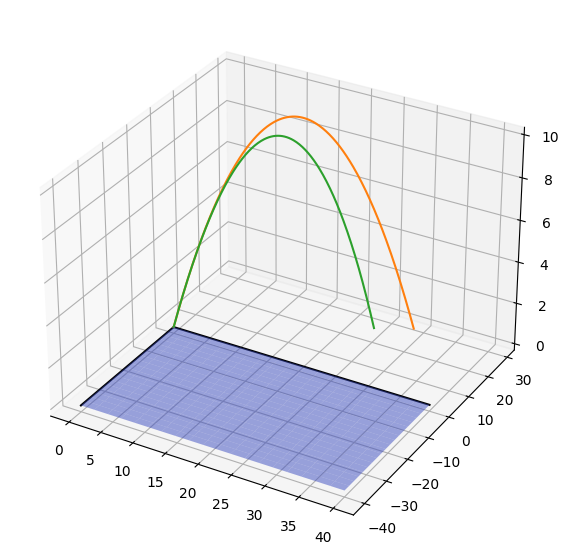

In [37]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81,elevation=flat_ground, drag=0):
    vx = speed * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = speed * cos(pi * theta / 180) * sin(pi * phi / 180)
    vz = speed * sin(pi * theta / 180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= elevation(x,y):
        t += dt

        drag_ax = (-vx) * drag
        drag_ay = (-vy) * drag
        drag_az = (-vz) * drag

        vx += drag_ax * dt
        vy += drag_ay * dt
        vz += drag_az * dt

        vz += g * dt

        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

plot_trajectories_3d(
    trajectory3d(45,45),
    trajectory3d(45,45, drag=0.1),
    bounds=[0,40,-40,0],
    elevation=flat_ground)

# 4 Optimizing range using gradient ascent

## 4.1 Plotting range versus launch parameters

In [38]:
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)

    fv = np.vectorize(f)

    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)

    # https://stackoverflow.com/a/54088910/1704140
    z = fv(X,Y)

#     # x and y are bounds, so z should be the value *inside* those bounds.
#     # Therefore, remove the last value from the z array.
#     z = z[:-1, :-1]
#     z_min, z_max = -z.min(), z.max()

    fig, ax = plt.subplots()

    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    # set the limits of the plot to the limits of the data
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)

<Figure size 700x700 with 0 Axes>

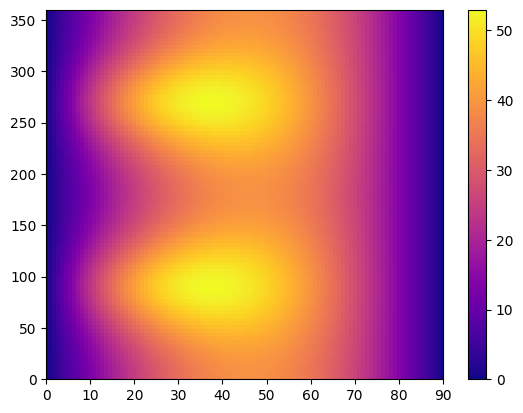

In [ ]:
# 横軸Θ、縦軸φ。一番右のバーは到達距離を表す色
scalar_field_heatmap(landing_distance,0,90,0,360)

## 4.2 The gradient of the range function

In [40]:
def plot_scalar_field(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False):
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')

    fv = np.vectorize(f)

    # Make data.
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased)

/tmp/ipykernel_10194/3892018700.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


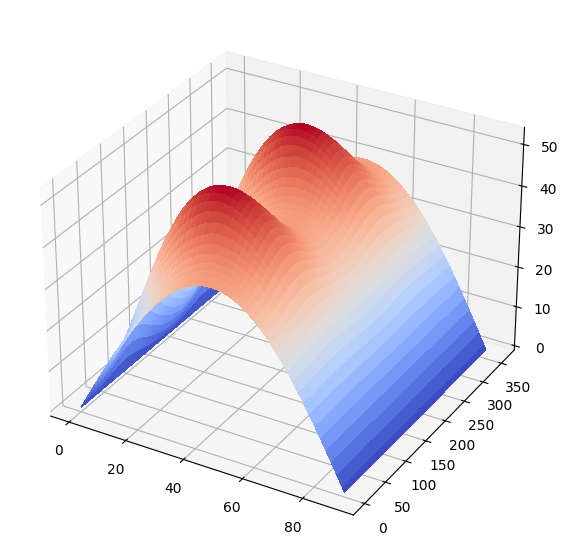

In [41]:
plot_scalar_field(landing_distance,0,90,0,360)

## 4.3 Finding the uphill direction with the gradient

In [34]:
def secant_slope(f,xmin,xmax): #<1>
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6): #<2>
    return secant_slope(f,x-dx,x+dx)

In [35]:
def approx_gradient(f,x0,y0,dx=1e-6):
    partial_x = approx_derivative(lambda x: f(x,y0), x0, dx=dx)
    partial_y = approx_derivative(lambda y: f(x0,y), y0, dx=dx)
    return (partial_x,partial_y)

In [36]:
def landing_distance_gradient(theta,phi):
    return approx_gradient(landing_distance, theta, phi)

Feel free to ignore the following code, which just supports the graphic of overlaying a vector field on a heatmap.

<Figure size 504x504 with 0 Axes>

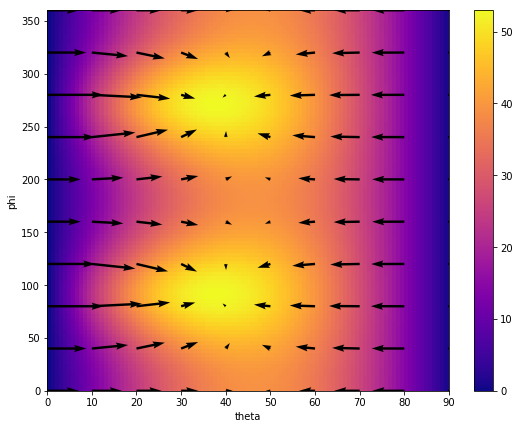

In [ ]:
from vectors import to_polar, to_cartesian

def draw_arrow(tip,tail,color='k'):
    tip_length = (plt.xlim()[1] - plt.xlim()[0]) / 20.
    length = sqrt((tip[1]-tail[1])**2 + (tip[0]-tail[0])**2)
    new_length = length - tip_length
    new_y = (tip[1] - tail[1]) * (new_length / length)
    new_x = (tip[0] - tail[0]) * (new_length / length)
    plt.gca().arrow(tail[0], tail[1], new_x, new_y,
    head_width=tip_length/1.5,
    head_length=tip_length/2,
    fc=color, ec=color)

def plot_vector_field(f,xmin,xmax,ymin,ymax,xsteps=10,ysteps=10,color='k'):

    X,Y = np.meshgrid(np.linspace(xmin,xmax, xsteps),np.linspace(ymin,ymax, ysteps))
    U = np.vectorize(lambda x,y : f(x,y)[0])(X,Y)
    V = np.vectorize(lambda x,y : f(x,y)[1])(X,Y)
    plt.quiver(X, Y, U, V,color=color)
    fig = plt.gcf()

scalar_field_heatmap(landing_distance,0,90,0,360)
plot_vector_field(landing_distance_gradient,0,90,0,360,xsteps=10,ysteps=10,color='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

In [1]:
scalar_field_heatmap(landing_distance,35,40,80,100)
plot_vector_field(landing_distance_gradient,35,40,80,100,xsteps=10,ysteps=15,color='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

NameError: name 'scalar_field_heatmap' is not defined

## 4.4 Implementing gradient ascent

In [39]:
from vectors import length

def gradient_ascent(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
    return x,y

def gradient_ascent_points(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    xs, ys = [x], [y]
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    return xs, ys

In [40]:
gradient_ascent(landing_distance,36,83)

(37.58114751557887, 89.99992616039857)

In [41]:
def gradient_ascent_points(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    xs, ys = [x], [y]
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    return xs, ys

In [42]:
gradient_ascent_points(landing_distance,36,83)

([36,
  36.122600166772905,
  36.23613677117784,
  36.34128767809185,
  36.43867738707969,
  36.528881661579746,
  36.612431593208484,
  36.689817410269534,
  36.76149182796271,
  36.82787319253559,
  36.889348238189385,
  36.94627463082189,
  36.998983312818545,
  37.04778060625894,
  37.09295017401476,
  37.1347547357105,
  37.17343773749891,
  37.20922482998986,
  37.24232519341257,
  37.27293280238169,
  37.30122755921293,
  37.32737638815892,
  37.35153417332558,
  37.373844629087024,
  37.394441177605785,
  37.41344766648102,
  37.43097908994937,
  37.44714219995173,
  37.46203614206898,
  37.47575300263992,
  37.48837829193029,
  37.49999144506543,
  37.51066624835594,
  37.520471237201555,
  37.529470054915286,
  37.537721861285455,
  37.545281588371104,
  37.55220026024622,
  37.5585252985331,
  37.5643007355652,
  37.56956745597163,
  37.57436347378886,
  37.57872406035837,
  37.58268198235851,
  37.58626769365101,
  37.58950943120426,
  37.59243345312513,
  37.59506413458223

<Figure size 504x504 with 0 Axes>

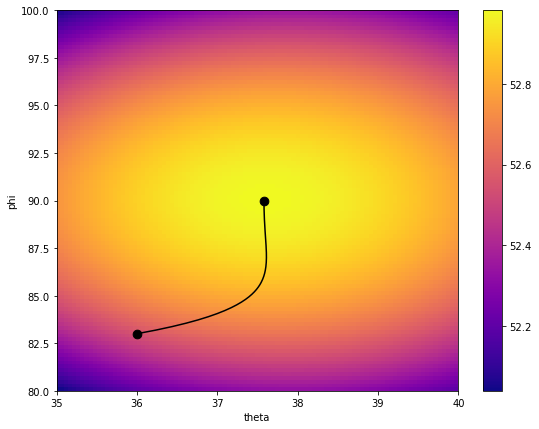

In [43]:
from vectors import to_polar, to_cartesian
scalar_field_heatmap(landing_distance,35,40,80,100)
plt.scatter([36,37.58114751557887],[83,89.99992616039857],c='k',s=75)
plt.plot(*gradient_ascent_points(landing_distance,36,83),c='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

In [44]:
landing_distance(37.58114751557887, 89.99992616039857)

52.98310689354378

## 4.5 Exercises